In [2]:
pip install pydicom

     |████████████████████████████████| 7.0MB 4.8MB/s 


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import pandas as pd
from glob import glob
import os
from matplotlib.patches import Rectangle
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
#os.chdir('/content/drive/My Drive/RSNA')

In [0]:
import keras
from keras.applications.densenet import DenseNet121
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#from generator import DataGenerator

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/train_png/',
        target_size=(256, 256),
        batch_size=16,color_mode='rgb',
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/validation_png/',
        target_size=(256, 256),
        batch_size=16,color_mode='rgb',
        class_mode='binary')

Found 4838 images belonging to 2 classes.
Found 441 images belonging to 2 classes.


In [9]:
input_shape=(256,256,3)
img_in = Input(input_shape)              #input of model 
model = DenseNet121(include_top= False , # remove  the 3 fully-connected layers at the top of the network
                weights='imagenet',      # pre train weight 
                input_tensor= img_in, 
                input_shape= input_shape,
                pooling ='max') 

Instructions for updating:
Colocations handled automatically by placer.
29089792/29084464 [==============================] - 1s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,Conv2D
from keras.layers import BatchNormalization,Activation
from keras.layers import MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Flatten
from keras.optimizers import adam
from keras import optimizers
import keras

In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
for layer in model.layers:
    layer.trainable = True

In [0]:

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f5968774e48> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f5914172588> True
<keras.layers.convolutional.Conv2D object at 0x7f5914172400> True
<keras.layers.normalization.BatchNormalization object at 0x7f5912999630> True
<keras.layers.core.Activation object at 0x7f5912999fd0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f59139f7c18> True
<keras.layers.pooling.MaxPooling2D object at 0x7f5913951668> True
<keras.layers.normalization.BatchNormalization object at 0x7f5912999f60> True
<keras.layers.core.Activation object at 0x7f5913923f98> True
<keras.layers.convolutional.Conv2D object at 0x7f59138d2f60> True
<keras.layers.normalization.BatchNormalization object at 0x7f5913849358> True
<keras.layers.core.Activation object at 0x7f591385cfd0> True
<keras.layers.convolutional.Conv2D object at 0x7f59137e7358> True
<keras.layers.merge.Concatenate object at 0x7f59137fc358> True
<keras.layers.normalization.BatchNormaliza

In [12]:
# Create the model
model_Densenet = Sequential()
 
# Add the vgg convolutional base model
model_Densenet.add(model)
 
# Add new layers
#model_vgg_flow.add(Flatten())
model_Densenet.add(Dense(256, activation='relu'))
model_Densenet.add(Dropout(0.25))
model_Densenet.add(Dense(128, activation='relu'))
model_Densenet.add(Dropout(0.35))
model_Densenet.add(Dense(1, activation='sigmoid'))

#model_vgg_flow.add(Dense(1, activation='softmax')) 
# Show a summary of the model. Check the number of trainable parameters
model_Densenet.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 7,332,929
Tra

In [0]:
adam=optimizers.Adam(lr=0.0001)
model_Densenet.compile(optimizer=adam,loss='binary_crossentropy',metrics=[keras.metrics.binary_accuracy])

In [15]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/RSNA/first_try_1.h5', monitor='val_loss',verbose=1,save_best_only=True, save_weights_only=True,mode='val_acc')
batch_size=128
model_Densenet.fit_generator(
        train_generator,
        steps_per_epoch=4800// batch_size,
        epochs=70,
        validation_data=validation_generator,callbacks=[checkpointer],
        validation_steps=440 // batch_size)
#model_Densenet.save_weights('/content/drive/My Drive/RSNA/first_try.h5')  # always save your weights after training or during training

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:407: RuntimeWarning: ModelCheckpoint mode val_acc is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/70
37/37 [==============================] - 13s 348ms/step - loss: 0.4148 - binary_accuracy: 0.8345 - val_loss: 0.5469 - val_binary_accuracy: 0.7317

Epoch 00001: val_loss improved from inf to 0.54687, saving model to /content/drive/My Drive/RSNA/first_try_1.h5
Epoch 2/70
37/37 [==============================] - 12s 337ms/step - loss: 0.4220 - binary_accuracy: 0.8057 - val_loss: 0.6016 - val_binary_accuracy: 0.6458

Epoch 00002: val_loss did not improve from 0.54687
Epoch 3/70
37/37 [==============================] - 13s 341ms/step - loss: 0.4184 - binary_accuracy: 0.8176 - val_loss: 0.5563 - val_binary_accuracy: 0.6667

Epoch 00003: val_loss did not improve from 0.54687
Epoch 4/70
37/37 [==============================] - 12s 333ms/step - loss: 0.3921 - binary_accuracy: 0.8333 - val_loss: 0.4669 - val_binary_accuracy: 0.7708

Epoch 00004: val_loss improved from 0.54687 to 0.46686, saving model to /content/drive/My Drive/RSNA/first_try_1.h5
Epoch 5/70
37/37 [====================

In [0]:
Dir=os.listdir('/content/drive/My Drive/validation_png/')

In [83]:
Dir

['validation_pneumonia', 'validation_normal']

In [84]:
import os
import cv2 

data = []
labels = []

patientID=[]
filename=[]
ValDir= '/content/drive/My Drive/validation_png/'

# loop over the input images
dirs = os.listdir(ValDir) 
for dir in dirs:
    absDirPath = os.path.join(os.path.sep,ValDir, dir)
    images = os.listdir(absDirPath)
    for imageFileName in images:
        
        # load the image, pre-process it, and store it in the data list
        imageFullPath = os.path.join(ValDir, dir, imageFileName)
        #print(imageFullPath)
        img = load_img(imageFullPath)
        arr = img_to_array(img)  #Numpy array with shape (233,233,3)
        arr = cv2.resize(arr, (256,256)) #Numpy array with shape (HEIGHT, WIDTH,3)
        #print(arr.shape)
        data.append(arr)
        patientID.append(imageFileName.split('/')[-1].split('.')[0])
        #print(patientID)
        filename.append(imageFullPath)
        
        #label = classes_to_int(dir)
        if(dir== 'validation_pneumonia'):
          label=1
        else:
          label=0
        #print(label)
        labels.append(label)


print(len(images))
print('Number of images :-',len(data))
print('Number of Labels',len(labels))
print('Number of patientID :-',len(patientID))
print(len(filename))





250
Number of images :- 441
Number of Labels 441
Number of patientID :- 441
441


In [0]:
Valid_df = pd.DataFrame({ 
                        'patientId':patientID,
                       'images':data,
                        'Labels': labels,
                         'Filenames':filename
                         })





In [0]:
#model_Densenet.load_weights("/content/drive/My Drive/RSNA/first_try.h5")
y_preds=[]
for img in Valid_df['images']:
  img=img.reshape(-1,256,256,3)
  pred_1=model_Densenet.predict(img)
  y_preds.append(pred_1)
  

In [0]:
Valid_df['preds']=preds

In [86]:
Valid_df['Labels'].value_counts()

0    250
1    191
Name: Labels, dtype: int64

In [0]:
y_preds_1=y_preds

In [0]:
preds=[]
for i, predicted in enumerate(y_preds_1):
  if (predicted[0][0])>=0.4:
    value=1
    preds.append(value)
      
    
  else :
    value=0
    preds.append(value)

In [0]:
y_val=Valid_df['Labels']

In [99]:
from sklearn.metrics import confusion_matrix,classification_report
print("\nConfusion_Marix is :\n",confusion_matrix(y_val, preds))
print("\nClassification_Report is :\n",classification_report(y_val,preds))


Confusion_Marix is :
 [[ 54 196]
 [ 43 148]]

Classification_Report is :
               precision    recall  f1-score   support

           0       0.56      0.22      0.31       250
           1       0.43      0.77      0.55       191

    accuracy                           0.46       441
   macro avg       0.49      0.50      0.43       441
weighted avg       0.50      0.46      0.42       441



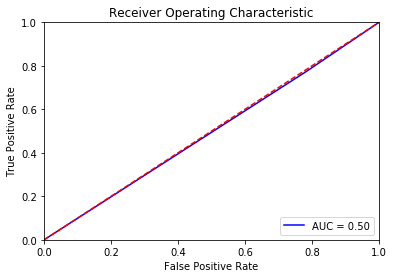

In [100]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
